In [10]:
from Initialization import Partition_coef
from Initialization import WCA

import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances
from IPython.display import clear_output
import os

First we need to process a data to match the input format: first column are particle radii, and other three columns are x, y, z coordinates. 

In my case I have an array with radii in the order of particle index, so for example first radius is for paricle with index 1, second is for particle with index 2 and so on.

In [8]:
values_for_radii = np.array([2.91852275, 2.2170764 , 2.88904884, 2.62080094, 3.218554  ,
       2.40653729, 2.72353542, 2.90040349, 3.3870447 , 2.51248797,
       2.7364253 , 3.06440199, 3.59152632, 3.32589555, 2.49985632,
       2.80116624, 2.8872006 , 2.71470284, 2.65963912, 3.20433993])

Below is the code that reads LAMMPS trajectory, ignoring the lines with description (first 9 lines on each time step) and adds a column with radii based on the index of particle by comparing with values from the array values_for_radii

In [12]:
def convert_coords(path_to_in_file, num_atoms, time_steps):
    data = []
    with open(path_to_in_file) as f:
        all_lines = f.readlines()

    for time_step in np.arange(time_steps):
        time_step_lo = 9 + time_step * (num_atoms + 9)
        time_step_hi = time_step_lo + num_atoms

        for line in all_lines[time_step_lo:time_step_hi]:
            stripped = [float(s.strip()) for s in line.split() if s.strip()]
            #stripped = [float(s.strip()) for s in line.split(" ")]
            data.append([values_for_radii[int(stripped[2]-1)]] + stripped[4:])
        
        # Updating progress
        print(f"Processed timestep {time_step+1}/{time_steps}")
        clear_output(wait = True)
    return np.array(data)

In [17]:
# Iterate over files

time_steps=399
n_neighbors=100
num_atoms = 8505
prefactor = 1
box_dim = 70
number_of_insertions = 3000
directory = '/Users/vova/Downloads/A1_7R12D_replicate1_320k/A1_7R12D_replicate1_320k/afterE-shrinkBox_A1_7R12D_replicate1_320k_1st.lammpstrj'
# Path to LAMMPS trajectory


Partitionings = []

data = convert_coords(path_to_in_file = file_path,   
               num_atoms = 8505,
               time_steps = 399)

for rad in np.arange(0, 10, 1):
        Partitionings.append(Partition_coef(rad, data, num_atoms, n_neighbors, box_dim, number_of_insertions))



Processed timestep 399/399


Now we can plot partition function

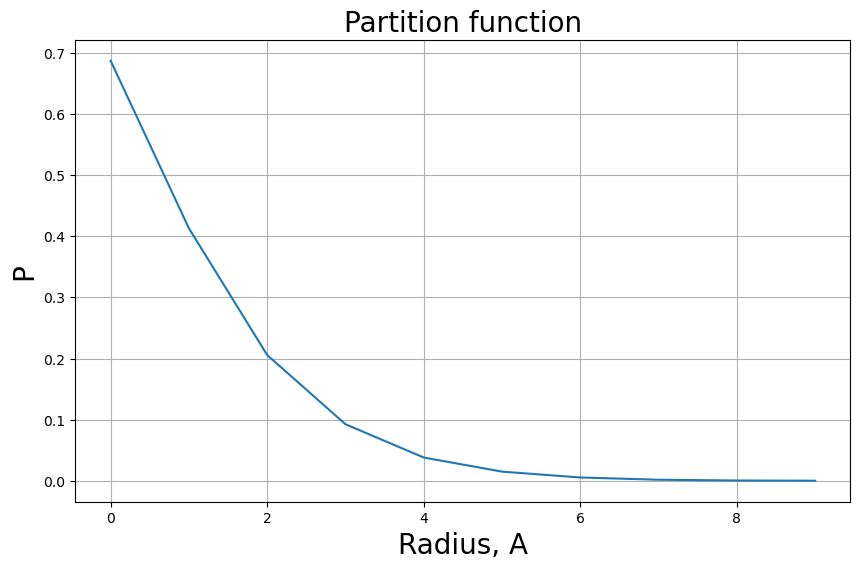

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 10, 1), Partitionings)
plt.title('Partition function', fontsize = 20)
plt.xlabel('Radius, A', fontsize = 20)
plt.ylabel('P', fontsize = 20)
plt.grid(True)
plt.show()

And free energy $F = - k_{B}T \ln(Partitioning)$

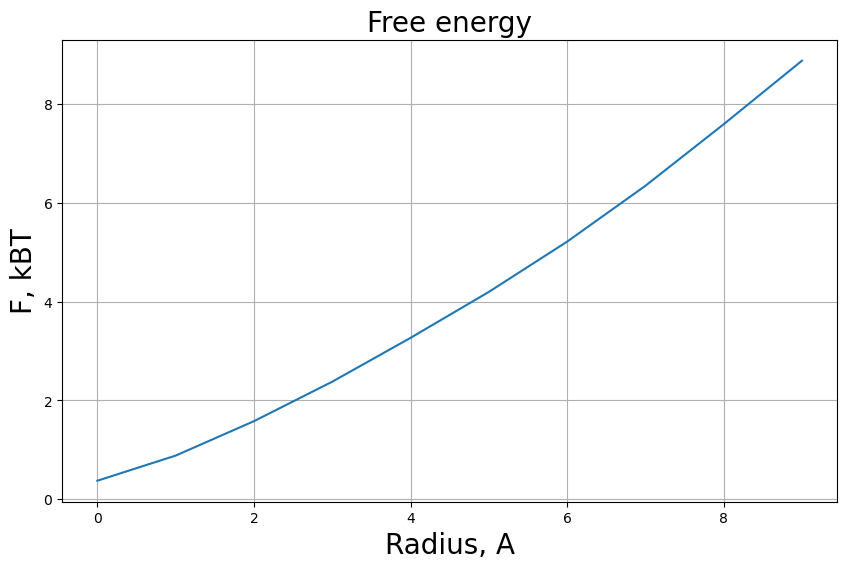

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 10, 1), -np.log(Partitionings))
plt.title('Free energy', fontsize = 20)
plt.xlabel('Radius, A', fontsize = 20)
plt.ylabel('F, kBT', fontsize = 20)
plt.grid(True)
plt.show()